In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from scipy import stats

# First, let's generate some sample data - let's use an ARMA(1,1) process
# We'll pretend we don't know this when analyzing it
np.random.seed(42)

def generate_arma(phi, theta, n_points=1000):
    """
    Generate an ARMA(1,1) process for demonstration
    phi: AR parameter
    theta: MA parameter
    """
    data = np.zeros(n_points)
    epsilon = np.random.normal(0, 1, n_points + 1)
    
    for t in range(1, n_points):
        data[t] = phi * data[t-1] + epsilon[t] + theta * epsilon[t-1]
    
    return data

# Generate sample data
data = generate_arma(phi=0.7, theta=0.3, n_points=1000)

# Step 1: Initial Analysis
def analyze_timeseries(data, lags=40):
    """
    Comprehensive analysis of a time series for model selection
    """
    # Create subplots
    fig = plt.figure(figsize=(15, 12))
    
    # Plot time series
    plt.subplot(311)
    plt.plot(data)
    plt.title('Time Series Plot')
    plt.grid(True)
    
    # Perform ADF test
    adf_result = adfuller(data)
    print('\nAugmented Dickey-Fuller Test Results:')
    print(f'Test Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Plot ACF
    plt.subplot(312)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.grid(True)
    
    # Plot PACF
    plt.subplot(313)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Step 2: Model Selection
def compare_models(data, orders):
    """
    Compare different ARIMA models using AIC and BIC
    """
    results = []
    for order in orders:
        try:
            model = ARIMA(data, order=order)
            fitted = model.fit()
            results.append({
                'order': order,
                'aic': fitted.aic,
                'bic': fitted.bic
            })
        except:
            print(f"Failed to fit order {order}")
            continue
    
    return pd.DataFrame(results).sort_values('aic')

# Step 3: Model Diagnostics
def model_diagnostics(model_fit):
    """
    Perform diagnostic checks on the fitted model
    """
    residuals = model_fit.resid
    
    fig = plt.figure(figsize=(15, 10))
    
    # Residuals over time
    plt.subplot(221)
    plt.plot(residuals)
    plt.title('Residuals over time')
    plt.grid(True)
    
    # Histogram
    plt.subplot(222)
    plt.hist(residuals, bins=30, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.plot(x, stats.norm.pdf(x, residuals.mean(), residuals.std()))
    plt.title('Residual distribution vs Normal')
    plt.grid(True)
    
    # ACF of residuals
    plt.subplot(223)
    plot_acf(residuals, lags=40, ax=plt.gca())
    plt.title('ACF of Residuals')
    
    # Q-Q plot
    plt.subplot(224)
    stats.probplot(residuals, dist="norm", plot=plt)
    
    plt.tight_layout()
    plt.show()


Step 1: Initial Analysis

Augmented Dickey-Fuller Test Results:
Test Statistic: -9.4873
p-value: 0.0000
Critical Values:
	1%: -3.4369
	5%: -2.8644
	10%: -2.5683


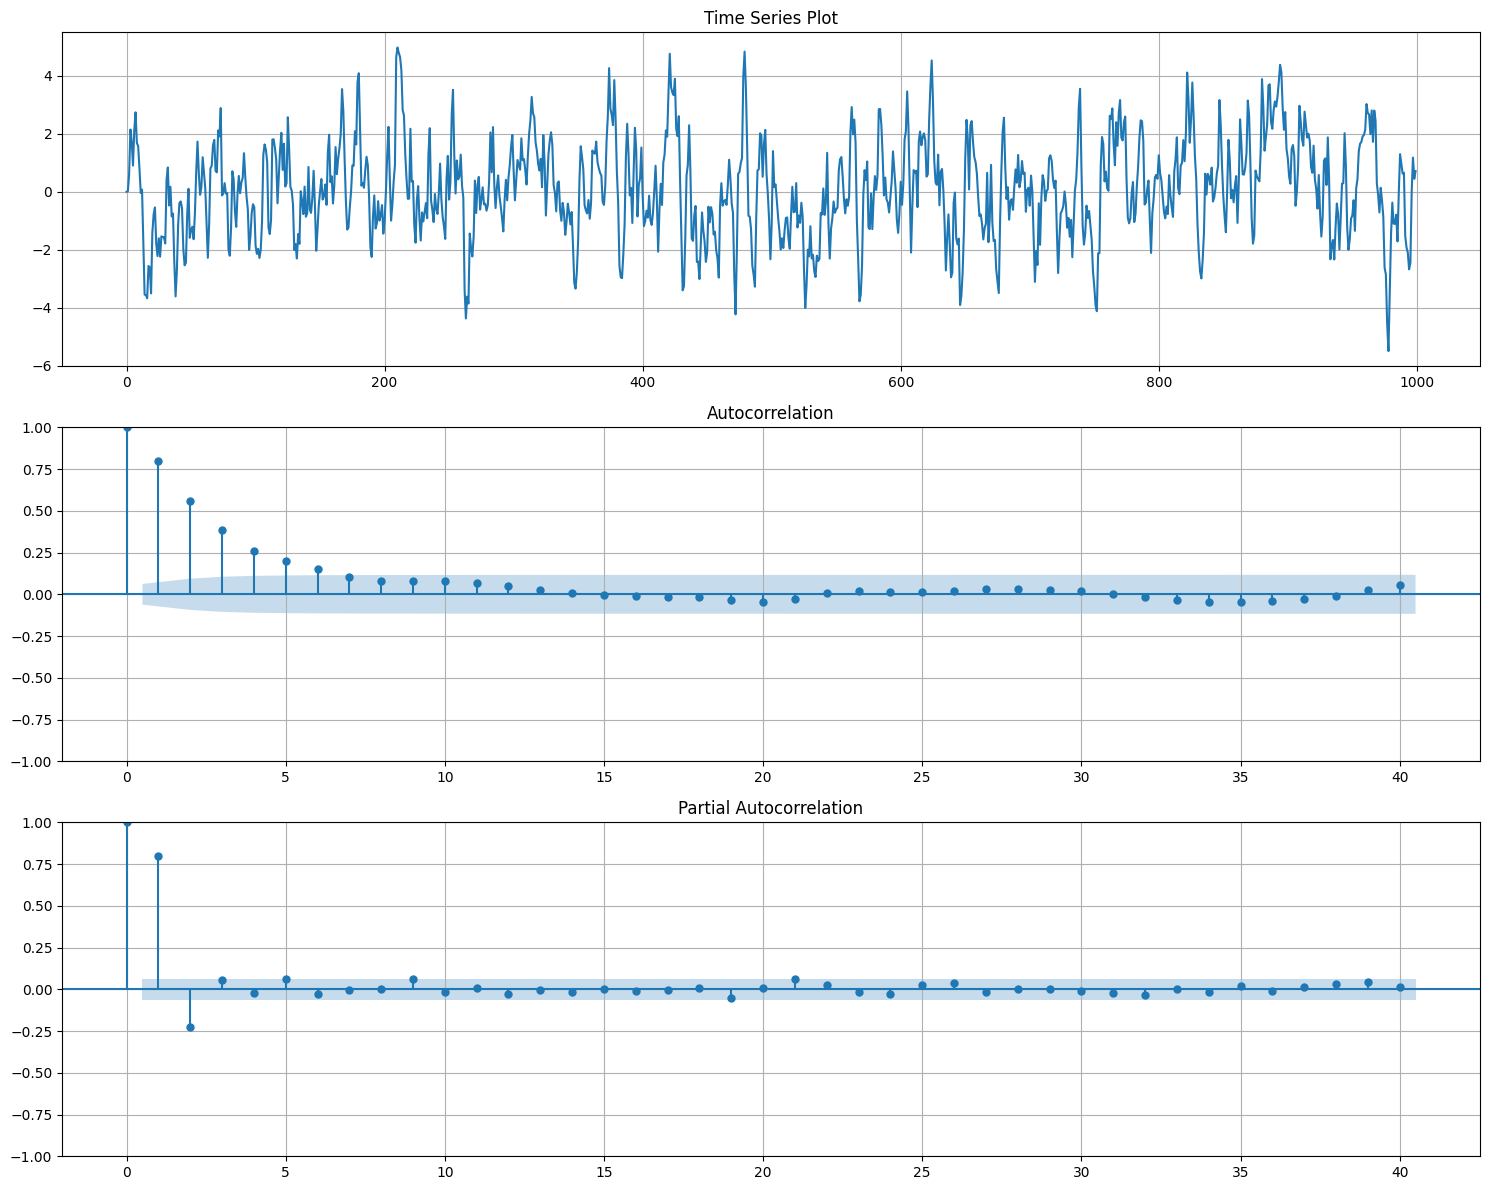

In [5]:

# Now let's use these functions to analyze our data
print("Step 1: Initial Analysis")
analyze_timeseries(data)



In [6]:
# Compare different models
print("\nStep 2: Model Selection")
orders = [(1,0,0), (0,0,1), (1,0,1), (2,0,0), (0,0,2), (2,0,1), (1,0,2)]
results = compare_models(data, orders)
print("\nModel Comparison Results:")
print(results)




Step 2: Model Selection

Model Comparison Results:
       order          aic          bic
2  (1, 0, 1)  2803.677674  2823.308696
5  (2, 0, 1)  2805.467937  2830.006714
6  (1, 0, 2)  2805.553982  2830.092758
3  (2, 0, 0)  2808.266464  2827.897485
0  (1, 0, 0)  2857.432138  2872.155404
4  (0, 0, 2)  2941.416387  2961.047408
1  (0, 0, 1)  3135.594278  3150.317544


In [7]:
# Fit the best model and check diagnostics
best_order = tuple(results.iloc[0]['order'])
print(f"\nStep 3: Fitting best model with order {best_order}")
best_model = ARIMA(data, order=best_order).fit()
print("\nModel Summary:")
print(best_model.summary())



Step 3: Fitting best model with order (1, 0, 1)

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1397.839
Date:                Sun, 12 Jan 2025   AIC                           2803.678
Time:                        22:20:40   BIC                           2823.309
Sample:                             0   HQIC                          2811.139
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0811      0.132      0.614      0.539      -0.178       0.340
ar.L1          0.6944      0.028     24.411      0.000       0.639


Step 4: Model Diagnostics


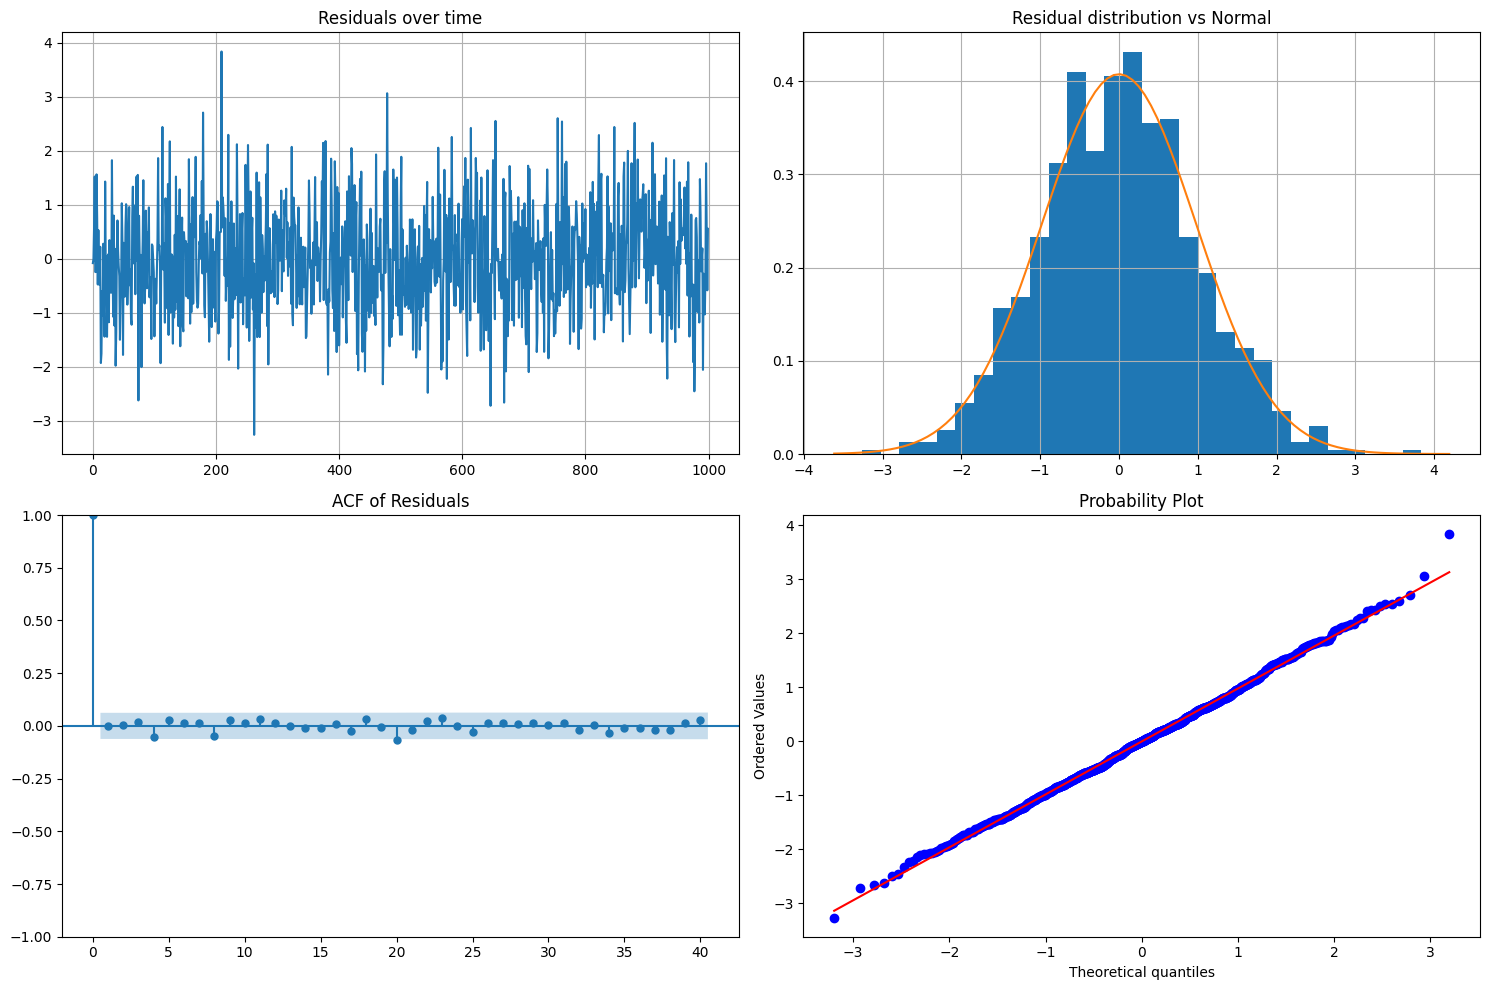

In [8]:

print("\nStep 4: Model Diagnostics")
model_diagnostics(best_model)